## Adaline vs Perceptron

In [11]:
import pandas as pd
from adaline.data import Adaline, plt, np
from perceptron.data import Perceptron, reproduce_x_times, unipolar, x_unipolar, d_unipolar, d_bipolar, get_random_except_first_row
plt.style.use('ggplot')

In [12]:
repetitions = 200

In [13]:
estimate_func_unipolar = lambda v: unipolar(0, v)
x_all_unipolar = reproduce_x_times(x_unipolar, repetitions)
d_all_unipolar = reproduce_x_times(d_unipolar, repetitions)
d_all_bipolar = reproduce_x_times(d_bipolar, repetitions)
x_all_unipolar = x_all_unipolar + get_random_except_first_row(x_all_unipolar.shape)
x_all_unipolar[:, :5], d_all_unipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.00145195, -0.00277457,  0.99697064,  1.02522974,  0.02195956],
        [ 0.02387213,  0.99079268,  0.04762962,  1.04541076, -0.0210112 ]]),
 array([[0, 0, 0, 1, 0]]))

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.02680595,  0.01954559,  0.96938284,  0.965682  , -0.04605124],
        [-0.03159573,  1.00198872,  0.02766608,  0.95489885, -0.00764829]]),
 array([[0, 0, 0, 1, 0]]))

In [14]:
test_size = int(x_all_unipolar.shape[1] * 0.25)
train_size = int(x_all_unipolar.shape[1] - test_size)

In [15]:
x_train_unipolar, x_test_unipolar = x_all_unipolar[:, :train_size], x_all_unipolar[:, train_size:]
d_train_unipolar, d_test_unipolar = d_all_unipolar[:, :train_size], d_all_unipolar[:, train_size:]
d_train_bipolar, d_test_bipolar = d_all_bipolar[:, :train_size], d_all_bipolar[:, train_size:]
x_train_unipolar.shape, x_test_unipolar.shape, d_train_unipolar.shape, d_test_unipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

((3, 600), (3, 200), (1, 600), (1, 200))

In [16]:
x_range = np.arange(-2, 4)
experiments_numb = 10

In [17]:
perceptrons_perceptron = []
adaline_perceptron = []
p = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, 1.0, (-0.1, 0.1))
a = Adaline(x_train_unipolar, d_train_bipolar, x_test_unipolar, d_test_bipolar, 0.002, 0.9, (-0.1, 0.1))
for i in range(experiments_numb):
    p.count()
    a.count()
perceptrons_perceptron.append(p)
adaline_perceptron.append(a)
len(perceptrons_perceptron), len(adaline_perceptron)

(1, 1)

(1, 1)

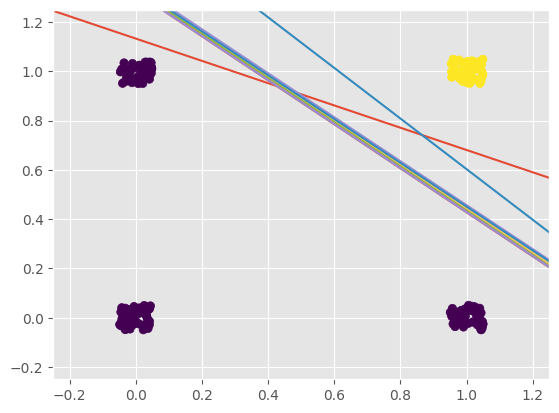

epochs:     7.2
matching:   100.0%
alfa:       1.0
w. range:   (-0.1, 0.1)
train size: 600


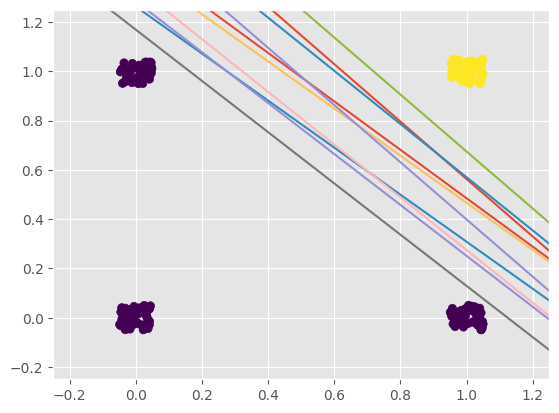

epochs:     2
matching:   100.0%
alfa:       0.002
w. range:   (-0.1, 0.1)
train size: 600
max err:    0.9


In [20]:
p.display()
print(p.to_string)
a.display()
print(a.to_string)